In [2]:
from datasets import load_dataset, load_from_disk, Dataset
import matplotlib.pyplot as plt

In [4]:
img_txt_ds = load_from_disk('image_text_dataset')

In [5]:
img_txt_test = load_from_disk('image_text_test')

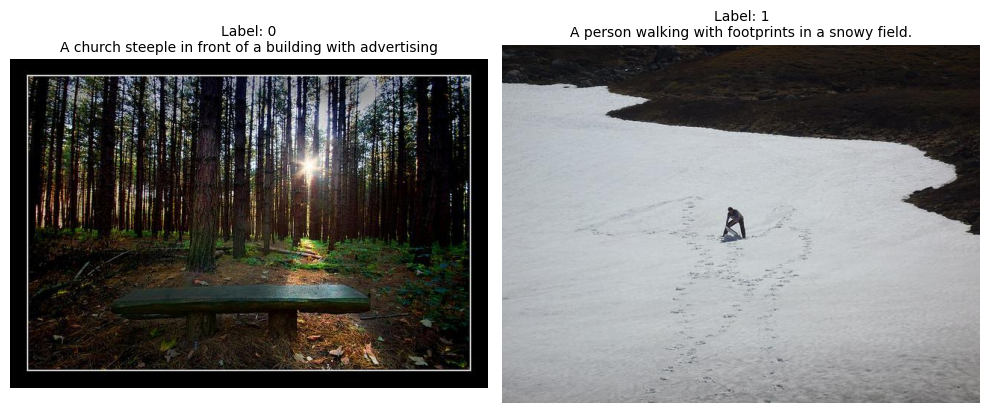

In [6]:
image_label_0 = None
caption_label_0 = None
for example in img_txt_ds:
    if example['label'] == 0:
        image_label_0 = example['image']
        caption_label_0 = example['caption']
        break

image_label_1 = None
caption_label_1 = None
for example in img_txt_ds:
    if example['label'] == 1:
        image_label_1 = example['image']
        caption_label_1 = example['caption']
        break

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image_label_0)
axes[0].axis('off')
axes[0].set_title(f"Label: 0\n{caption_label_0}", fontsize=10)


axes[1].imshow(image_label_1)
axes[1].axis('off')
axes[1].set_title(f"Label: 1\n{caption_label_1}", fontsize=10)

plt.tight_layout()
plt.show()


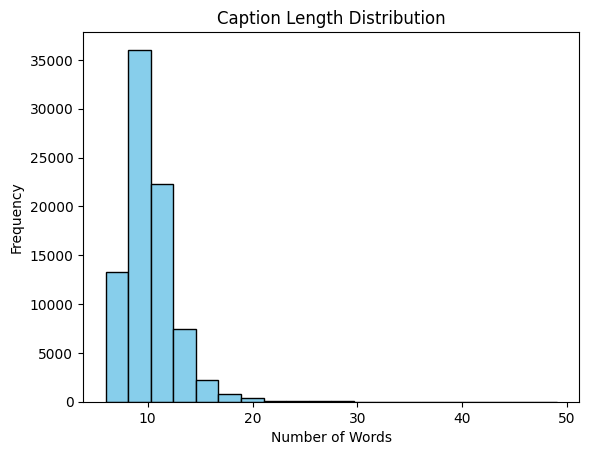

In [7]:
caption_lengths = [len(sample["caption"].split()) for sample in img_txt_ds]
plt.hist(caption_lengths, bins=20, color="skyblue", edgecolor="black")
plt.title("Caption Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

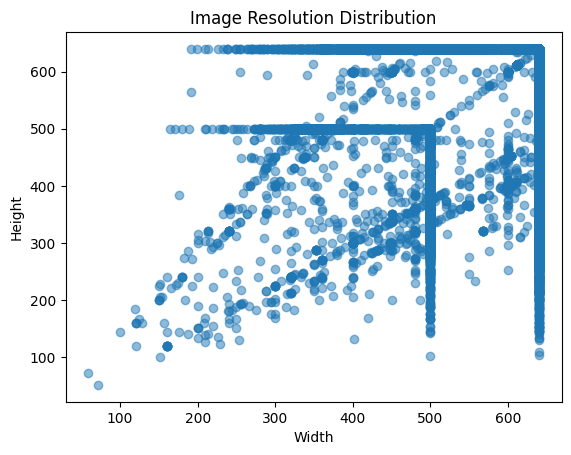

In [8]:
image_sizes = [sample["image"].size for sample in img_txt_ds]
widths, heights = zip(*image_sizes)
plt.scatter(widths, heights, alpha=0.5)
plt.title("Image Resolution Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()


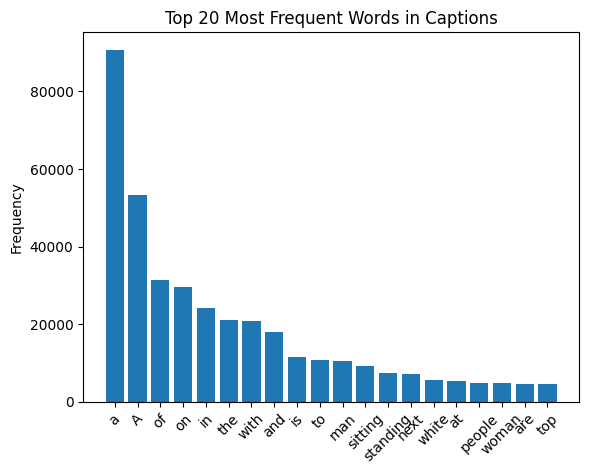

In [9]:
from collections import Counter

all_words = [word for sample in img_txt_ds for word in sample["caption"].split()]
word_counts = Counter(all_words).most_common(20)
words, counts = zip(*word_counts)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Captions")
plt.ylabel("Frequency")
plt.show()
